In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image

In [13]:
df=pd.read_csv("/Users/jokes/Desktop/dane/driving_log.csv",
              names=['center','left',"right","steering_angle","throttle","break","speed"])
df.head()

,center,left,right,steering_angle,throttle,break,speed
0,C:\Users\jokes\Desktop\dane\IMG\center_2019_05...,C:\Users\jokes\Desktop\dane\IMG\left_2019_05_1...,C:\Users\jokes\Desktop\dane\IMG\right_2019_05_...,0.0,0.0,0.0,0.000006
1,C:\Users\jokes\Desktop\dane\IMG\center_2019_05...,C:\Users\jokes\Desktop\dane\IMG\left_2019_05_1...,C:\Users\jokes\Desktop\dane\IMG\right_2019_05_...,0.0,0.0,0.0,0.000014
2,C:\Users\jokes\Desktop\dane\IMG\center_2019_05...,C:\Users\jokes\Desktop\dane\IMG\left_2019_05_1...,C:\Users\jokes\Desktop\dane\IMG\right_2019_05_...,0.0,0.0,0.0,0.000020
3,C:\Users\jokes\Desktop\dane\IMG\center_2019_05...,C:\Users\jokes\Desktop\dane\IMG\left_2019_05_1...,C:\Users\jokes\Desktop\dane\IMG\right_2019_05_...,0.0,0.0,0.0,0.000017
4,C:\Users\jokes\Desktop\dane\IMG\center_2019_05...,C:\Users\jokes\Desktop\dane\IMG\left_2019_05_1...,C:\Users\jokes\Desktop\dane\IMG\right_2019_05_...,0.0,0.0,0.0,0.000014


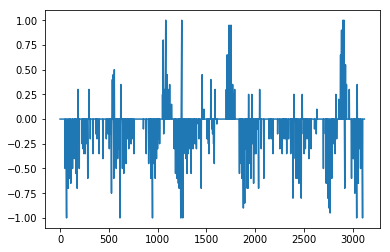

In [15]:
df['steering_angle'].plot()

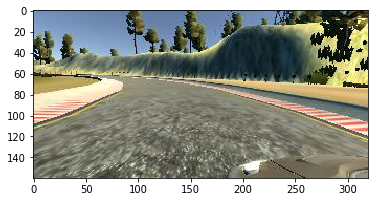

In [18]:
img=Image.open(df['left'][0])
plt.imshow(img)

In [20]:
img=np.asarray(img)
img.shape

(160, 320, 3)

In [21]:
def loadImage(fname):
    return np.asarray(Image.open(fname))
def process_image(img):
    return img[10:130:2,::4,:]

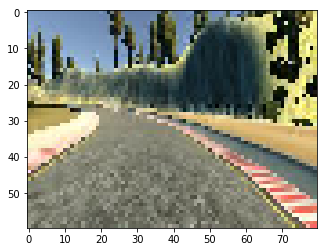

In [22]:
img =process_image(loadImage(df['center'][0]))
plt.imshow(img)

In [24]:
X=[process_image(loadImage(fname)) for fname in df['center']]
X+=[process_image(loadImage(fname)) for fname in df['left']]
X+=[process_image(loadImage(fname)) for fname in df['right']]

Y=np.array(df['steering_angle'])
Y=np.concatenate([Y,Y+0.4,Y-0.4])

In [25]:
X=np.array(X)
print(X.shape)
print(Y.shape)

(9357, 60, 80, 3)
(9357,)


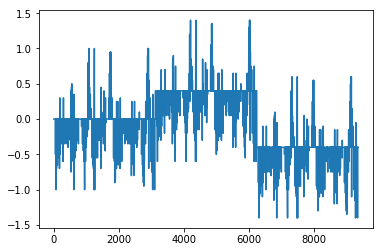

In [27]:
plt.plot(Y)
plt.show();

In [28]:
np.save('X.npy',X)
np.save('Y.npy',Y)